# Playstore Data Analysis

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Data



In [2]:
data = pd.read_csv("C:\\Users\\Rekha Singh\\Desktop\\rekha\\Python_Report\\Python_Projects\\Playstore_Assignment\\playstore-analysis.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Shape of data

In [3]:
data.shape

(10841, 13)

# 1. Data clean up – Missing value treatment

a. Drop records where rating is missing since rating is our target/study variable

In [4]:
#Display data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
#Count the total null values 

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#Drop records where rating is missing

data.dropna(subset=['Rating'], inplace=True)

In [7]:
#Now chack how many record after drop records where rating is missing

data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [8]:
data.shape

(9367, 13)

b. Check the null values for the Android Ver column.

In [9]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


 b(i) Are all 3 records having the same problem?
 
 Yes all three records having same problem with Andriod version is NaN

In [10]:
# Index number of 3rd record i.e. record for “Life Made WIFI …”

data[data['Android Ver'].isna()].index[-1]

10472

In [11]:
# b(ii) Drop the 3rd record i.e. record for “Life Made WIFI …”

data.drop(10472, inplace=True)

In [12]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [13]:
#Find out the Mode value

data['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [14]:
# b(iii) Replace remaining missing values with the mode

data["Android Ver"].fillna('4.1 and up', inplace = True) 

In [15]:
# lets check 
data['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [16]:
# C. Current ver – replace with most common value

data["Current Ver"].fillna(data['Current Ver'].mode()[0], inplace = True)

# 2. Data clean up – correcting the data types


In [17]:
#Display data types 

data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

2 (a). Which all variables need to be brought to numeric types?

Ans: Reviews and Installs need to be brought to numeric types.


In [21]:
data['Price'].nunique()

73

In [24]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [25]:
# 2.(b) b. Price variable – remove $ sign and convert to float

data['Price'] = [x.lstrip('$') for x in data['Price']]
data['Price'] = data['Price'].apply(lambda x : float(x.replace("+","").replace(',',"")))

In [34]:
data['Reviews'] = data['Reviews'].apply(lambda x : float(x))

In [35]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [39]:
import re

In [40]:
data['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 9366, dtype: float64

In [103]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64

In [104]:
# 2(d) Convert all other identified columns to numeric

#data['Reviews']= data['Reviews'].astype('int')

# 3. Sanity checks –check for the following and handle accordingly

In [105]:
print(data['Rating'].min())
print(data['Rating'].max())

1.0
5.0


In [106]:
data.loc[data.Rating < 1] & data.loc[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


3 a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.
i. Are there any such records? Drop if so.
Ans:- There are no such records with rating less than 1 or greater than 5.

In [41]:
#b. Reviews should not be more than installs as only those who installed can review the app.
# i. Are there any such records? Drop if so.

data[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.000000,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Yes, there are 7 records where Review is greater than Installs.

In [108]:
# Drop all 7 records.

data.drop(data[data['Reviews'] > data['Installs']].index, inplace=True)

In [109]:
data[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Droped all 7 records

# 4. Identify and handle outliers – 

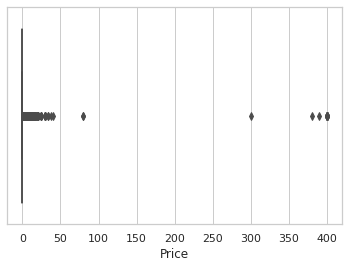

In [110]:
# 4 (a). Price column
# i. Make suitable plot to identify outliers in price

sns.boxplot(data['Price'])

In [111]:
# 4 (ii). Do you expect apps on the play store to cost $200? Check out these cases

data.drop(data[data['Price']>70].index, inplace=True)

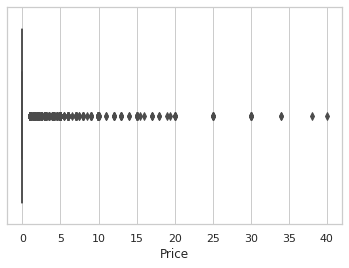

In [112]:
# 4 (iii). After dropping the useless records, make the suitable plot again to identify outliers

sns.boxplot(data['Price'])

In [113]:
# 4.(iv). drop Limit data to records with price < $30

data.drop(data[data['Price']>=30].index, inplace=True)

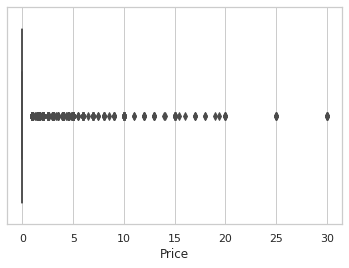

In [114]:
sns.boxplot(data['Price'])

b. Reviews column
i. Make suitable plot

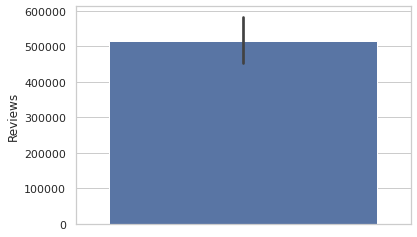

In [115]:
# Try with bar plot
sns.barplot(y = data['Reviews'])

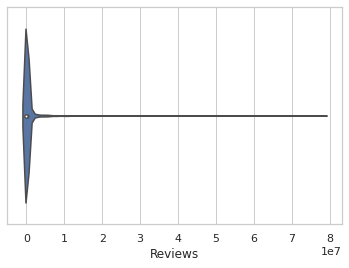

In [116]:
# Try with Violinplot 

sns.violinplot(x = data['Reviews'])

In [117]:
#ii. Limit data to apps with < 1 Million reviews

data[data['Reviews']>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [118]:
data.drop(data[data['Reviews']>=1000000].index, inplace=True)

In [119]:
# Dropped 704 rows 

data[data['Reviews']>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [120]:
#C(i). What is the 95th percentile of the installs?

data[data['Installs'].quantile(0.95) < data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,21516.529524,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,21516.529524,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
225,Secure Folder,BUSINESS,3.8,14760,8600.000000,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.000000,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.000000,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.000000,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895,25000.000000,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up


In [121]:
# C (ii). Drop records having a value more than the 95th percentile

data.drop(data[data['Installs'].quantile(0.95) < data['Installs']].index, inplace=True)

In [122]:
data[data['Installs'].quantile(0.95) < data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5. Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?


In [123]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

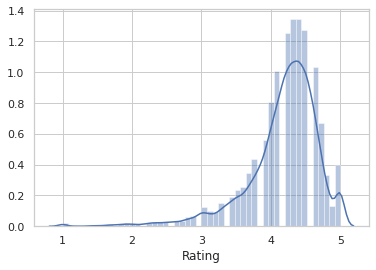

In [124]:
sns.distplot(data['Rating'])

In [125]:
# a. How do you explain this?

print('The skewness of this distribution is',data['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(data.Rating.median(),data.Rating.mean()))

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [126]:
# b. What is the implication of this on your analysis?

data['Rating'].mode()

0    4.3
dtype: float64

Since mode = median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

# 6. What are the top Content Rating values?

In [127]:
# 6(a) a. Are there any values with very few records?

data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Adults only 18+ and Unrated are values with very few records so we drop them.

In [128]:
data[data['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.0,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [129]:
data[data['Content Rating'] == 'Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [130]:
#Replacing unwanted values with NaN

A = []
for i in data['Content Rating']:
    A.append(i.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

data['Content Rating']=A

In [131]:
# Droping the NaN values.

B = data[data["Content Rating"] == 'NaN'].index
data.drop(labels=B, inplace=True)
print('droped cols',B)

droped cols Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [132]:
#Check 

data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

 a. Make a joinplot to understand the effect of size on rating

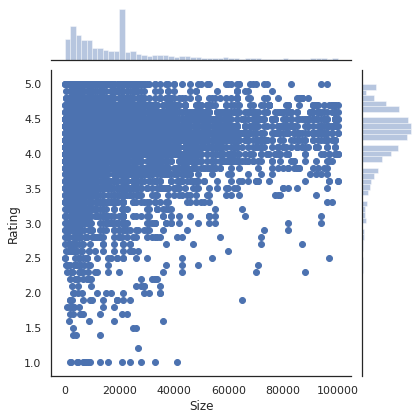

In [133]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='Size', y='Rating', data=data)

b. Do you see any patterns?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

c. How do you explain the pattern?

Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

# 8. Effect of price on rating

In [134]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

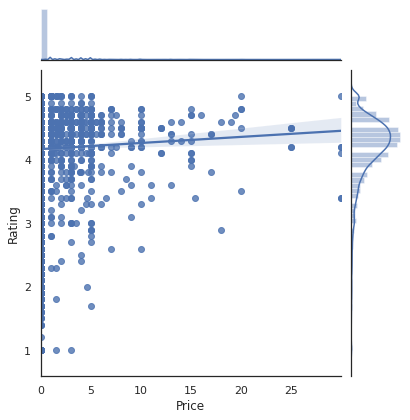

In [135]:
# a. Make a jointplot (with regression line)
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')

b. What pattern do you see?

Ans: Generally on increasing the Price, Rating remains almost constant greater than 4.

c. How do you explain the pattern?

Ans:- Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [136]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


d. Replot the data, this time with only records with price > 0

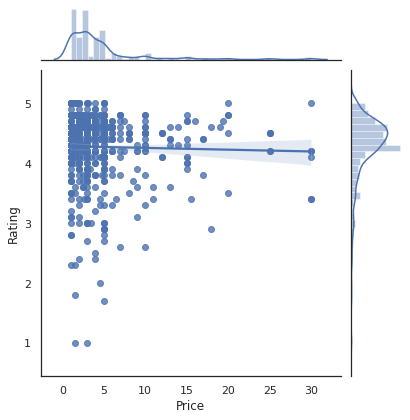

In [137]:
P = data.loc[data.Price>0]
sns.jointplot(x='Price', y='Rating', data=P, kind='reg')
plt.show()

e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight i.e their is very weakly Negative Correlation between Price and Rating.

In [138]:
P.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together –

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

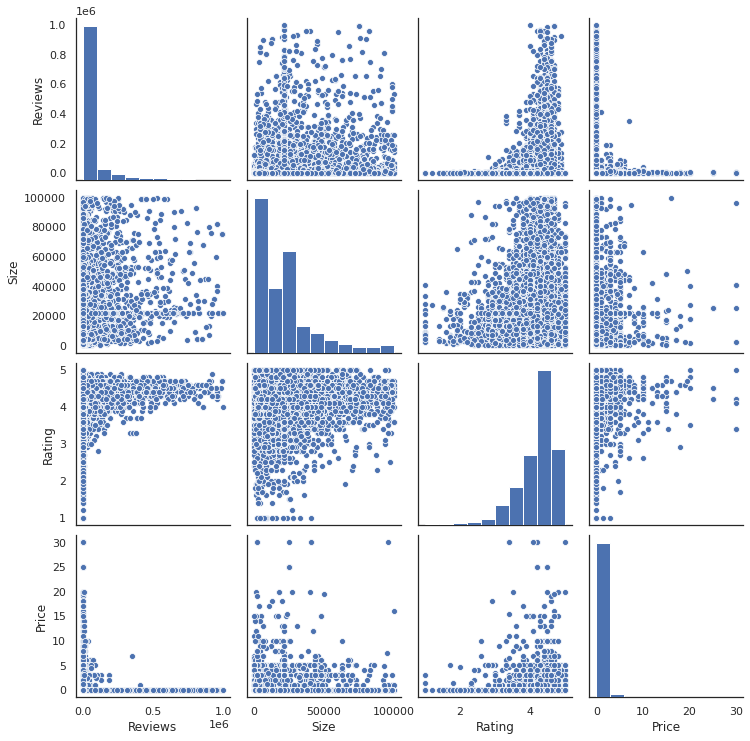

In [139]:
sns.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'])

# 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

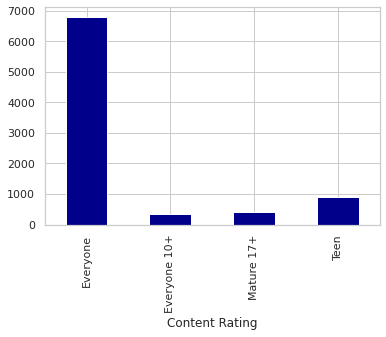

In [140]:
sns.set(style="whitegrid")
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkblue")

b. Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

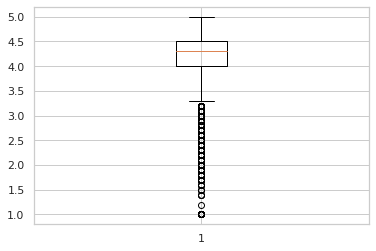

In [141]:
plt.boxplot(data['Rating'])
plt.show()

c. Choose the right metric and plot

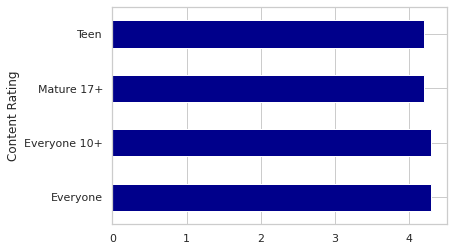

In [142]:
data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkblue")
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

In [143]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [144]:
C = pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
C

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


c. Make a heatmap of this
i. Annotated
ii. Greens color map

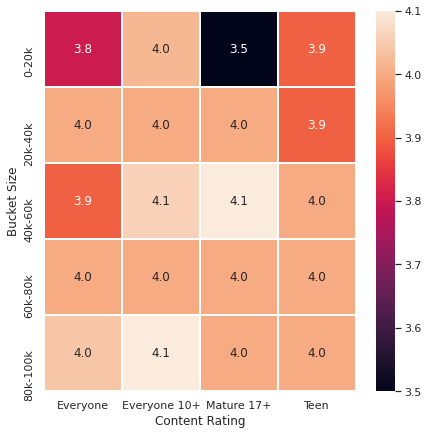

In [145]:
# Annotated

f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(C, annot=True, linewidths=.7, fmt='.1f',ax=ax)
plt.show()

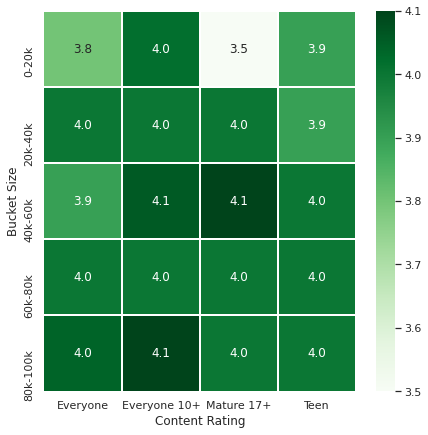

In [146]:
# ii.Greens color map

f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(C, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.